In [67]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt

In [68]:
disease_states = ['Flu', 'Cold']
symptom_states = ['Yes', 'No']

In [69]:
model = DiscreteBayesianNetwork([
  ('Disease', 'Fever'),
  ('Disease', 'Cough'),
  ('Disease', 'Fatigue',),
  ('Disease', 'Chills')
])

In [70]:
disease_cpd = TabularCPD(
    variable='Disease',
    variable_card=2,
    values= [
        [0.3], #flu
        [0.7]  # cold
    ],
    state_names={
        'Disease' :  disease_states
    }
)

# P (fever | disease)
fever_cpd = TabularCPD(
    variable='Fever',
    variable_card=2,
    values=[
      [0.9, 0.5],
      [0.1, 0.5]
    ],
    evidence=['Disease'],
    evidence_card=[2],
    state_names={
      'Fever': symptom_states,
      'Disease': disease_states
    }
)

# P (cough | disease)
cough_cpd = TabularCPD(
    variable='Cough',
    variable_card=2,
    values= [
        [0.8, 0.6], # yes
        [0.2, 0.4]  # no
    ],
    evidence=['Disease'],
    evidence_card=[2],
    state_names= {
        'Cough' : symptom_states,
        'Disease' : disease_states
    }
)

# P (fatigue | disease)
fatigue_cpd = TabularCPD(
  variable='Fatigue',
  variable_card=2,
  values=[
    [0.7, 0.3],
    [0.3, 0.7]
  ],
  evidence=['Disease'],
  evidence_card=[2],
  state_names={
    'Fatigue': symptom_states,
    'Disease': disease_states
  }
)

# P (chills | disease)
chills_cpd = TabularCPD(
  variable='Chills',
  variable_card=2,
  values=[
    [0.6, 0.4],
    [0.4, 0.6]
  ],
  evidence=['Disease'],
  evidence_card=[2],
  state_names={
    'Chills': symptom_states,
    'Disease': disease_states
  }
)


In [71]:
model.add_cpds(disease_cpd, fever_cpd, cough_cpd, chills_cpd, fatigue_cpd)

In [72]:
assert model.check_model(), "Model incorrect"

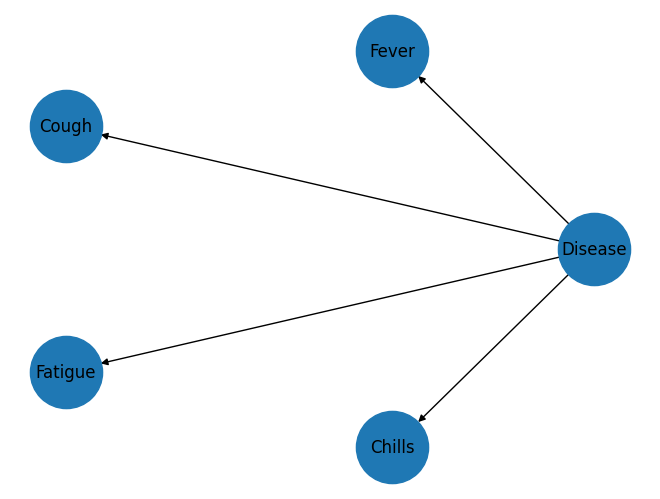

In [73]:
nx.draw(model,
  with_labels=True, 
  node_size=2700,
  pos=nx.circular_layout(model)
)
plt.show()

In [74]:
inference = VariableElimination(model)

In [75]:
result1 = inference.query(variables=['Disease'], evidence={'Fever': 'Yes', 'Cough': 'Yes'})
print(result1)

+---------------+----------------+
| Disease       |   phi(Disease) |
+===============+================+
| Disease(Flu)  |         0.5070 |
+---------------+----------------+
| Disease(Cold) |         0.4930 |
+---------------+----------------+


In [76]:
result2 = inference.query(variables=['Disease'], evidence={'Fever': 'Yes', 'Cough': 'Yes', 'Chills': 'Yes'})
print(result2)

+---------------+----------------+
| Disease       |   phi(Disease) |
+===============+================+
| Disease(Flu)  |         0.6067 |
+---------------+----------------+
| Disease(Cold) |         0.3933 |
+---------------+----------------+


In [77]:
result3 = inference.query(variables=['Fatigue'], evidence={'Disease': 'Flu'})
print(result3)

+--------------+----------------+
| Fatigue      |   phi(Fatigue) |
+==============+================+
| Fatigue(Yes) |         0.7000 |
+--------------+----------------+
| Fatigue(No)  |         0.3000 |
+--------------+----------------+
